# Prediksi Penyakit Jantung dengan Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize

In [2]:
# === 2. Ambil dan Siapkan Data ===
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets.squeeze()

df = X.copy()
df["target"] = y

In [3]:
# 5 data teratas
print(df.head())

# Informasi struktur data
df.info()

# Statistik deskriptif
df.describe()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


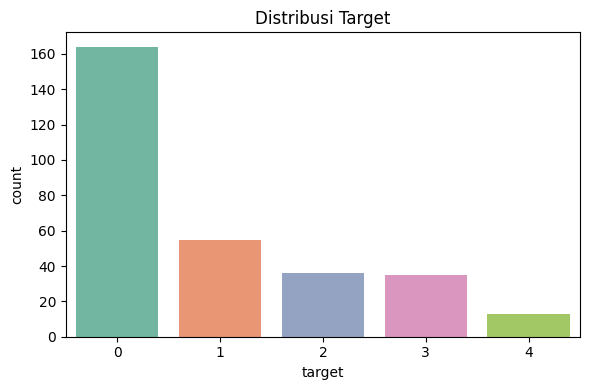

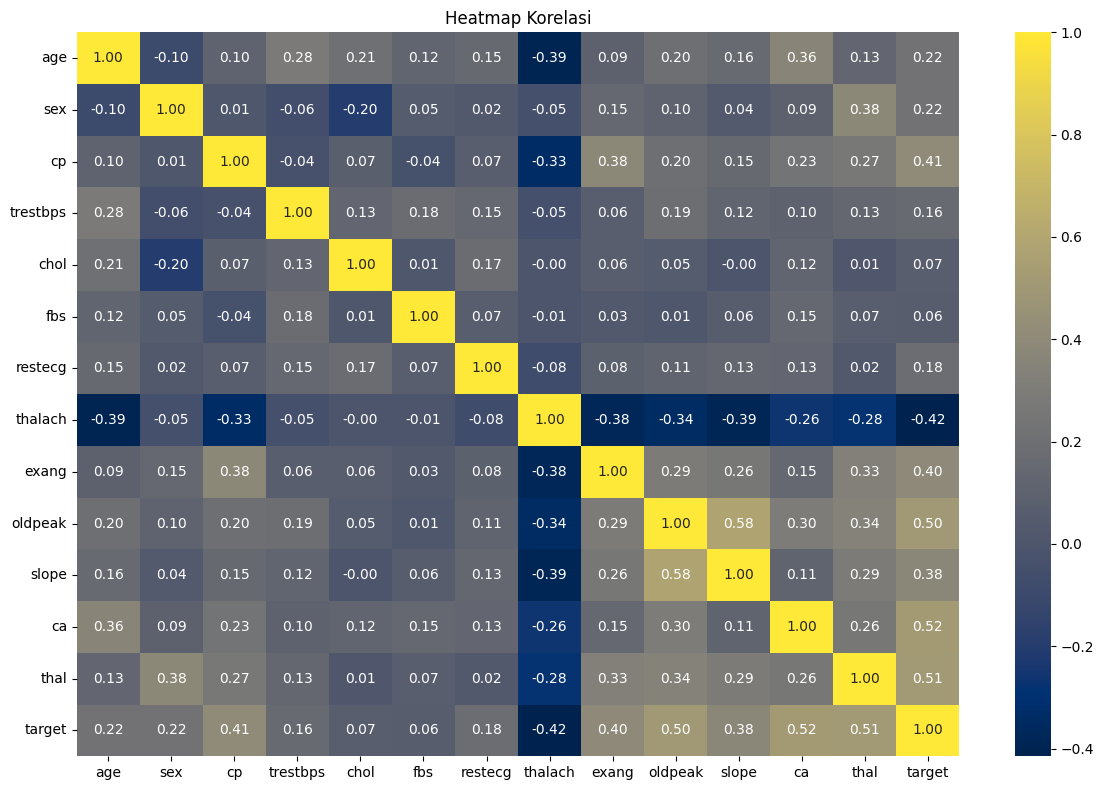

In [4]:
# === 4. Visualisasi Distribusi & Korelasi ===
plt.figure(figsize=(6, 4))
sns.countplot(x="target", hue="target", data=df, palette="Set2", legend=False)
plt.title("Distribusi Target")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="cividis")
plt.title("Heatmap Korelasi")
plt.tight_layout()
plt.show()

In [5]:
# === 5. Split Data ===
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# === 6. Train Decision Tree ===
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [7]:
# === 7. Prediksi dan Evaluasi ===
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {accuracy:.2f}")

Confusion Matrix:
 [[28  0  0  1  0]
 [ 5  4  2  1  0]
 [ 2  1  4  2  0]
 [ 1  5  0  1  0]
 [ 1  1  1  1  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.36      0.33      0.35        12
           2       0.57      0.44      0.50         9
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         4

    accuracy                           0.61        61
   macro avg       0.37      0.38      0.37        61
weighted avg       0.53      0.61      0.56        61


Akurasi: 0.61


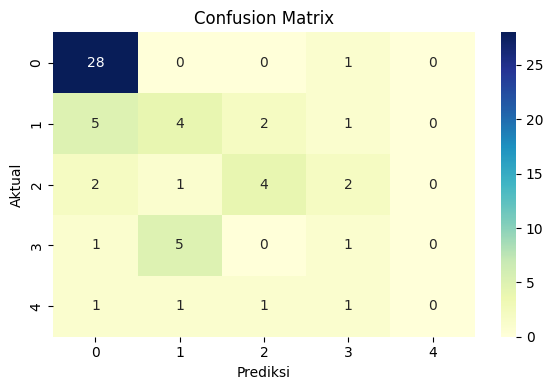

In [8]:
# === 8. Visualisasi Confusion Matrix ===
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

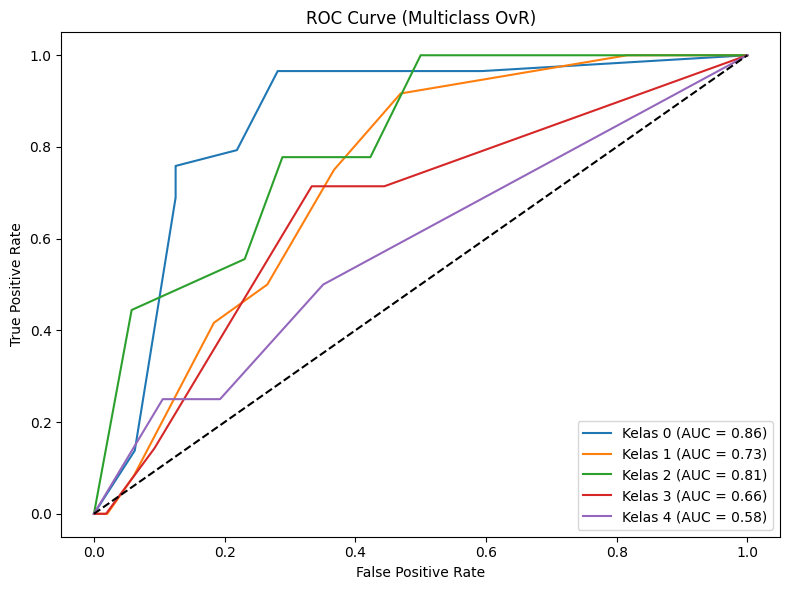

In [9]:
# === 9. ROC Curve Multiclass (One-vs-Rest) ===
# Binarisasi label
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_prob = model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Kelas {model.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass OvR)")
plt.legend()
plt.tight_layout()
plt.show()

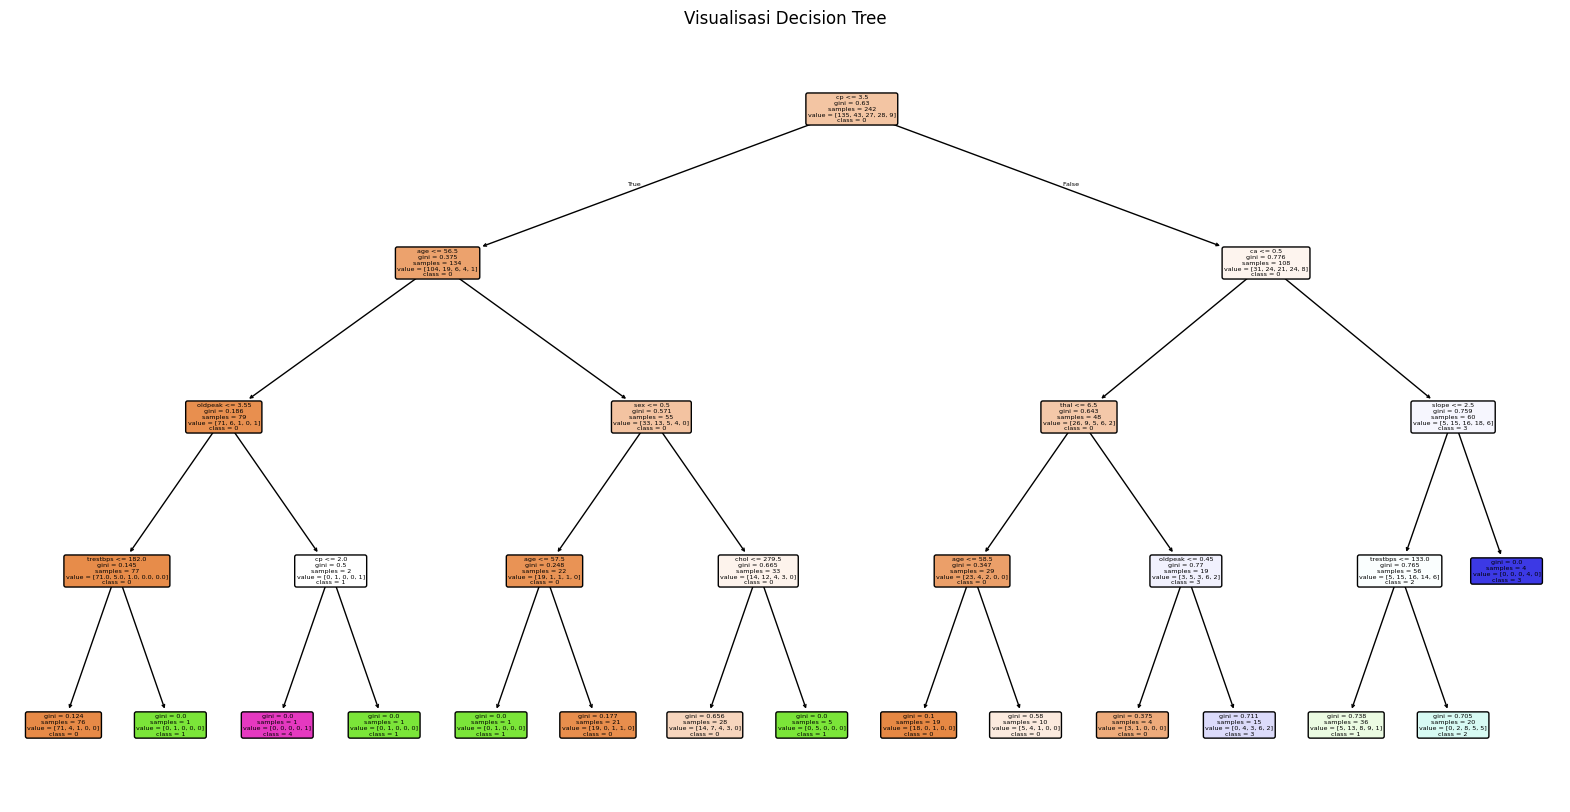

In [10]:
# === 10. Visualisasi Pohon Keputusan ===
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in model.classes_],
    filled=True,
    rounded=True
)
plt.title("Visualisasi Decision Tree")
plt.savefig("decision_tree_visual.png")
plt.show()